In [1]:
import utils
import scipy.constants as sc
import numpy as np

temperature = 300  # K

kTval = sc.R * temperature / 1000  # kJ/mol

# molecular chain
# T-bond-DPP-bond-T-bond-T-bond-E-bond-T-bond
l = [2.533, 1.432, 3.533, 1.432, 2.533, 1.432, 2.533, 1.433, 1.363, 1.433, 2.533, 1.432]
# change the logic of bond order and angle order，l_array[1] rotated by angle[1]
Angle = np.deg2rad(np.array([-14.92, -10.83, 30.79, -30.79, 10.83, 14.92, -14.91, -13.29, -53.16, 53.16, 13.29, 14.91]))
# rotation types of bonds: 0 is fixed, others defined in the labels
rotation = np.array([0, 1, 0, 1, 0, 2, 0, 3, 0, 3, 0, 2])
labels = {
    1: {'label': 'T-DPP', 'color': 'b'},
    2: {'label': 'T-T', 'color': 'm'},
    3: {'label': 'T-E', 'color': 'c'},
    # 4: {"label": "FT-FT", "color": 'g'},
    # 5: {"label": "ADTDI-FT", "color": 'r'},
}

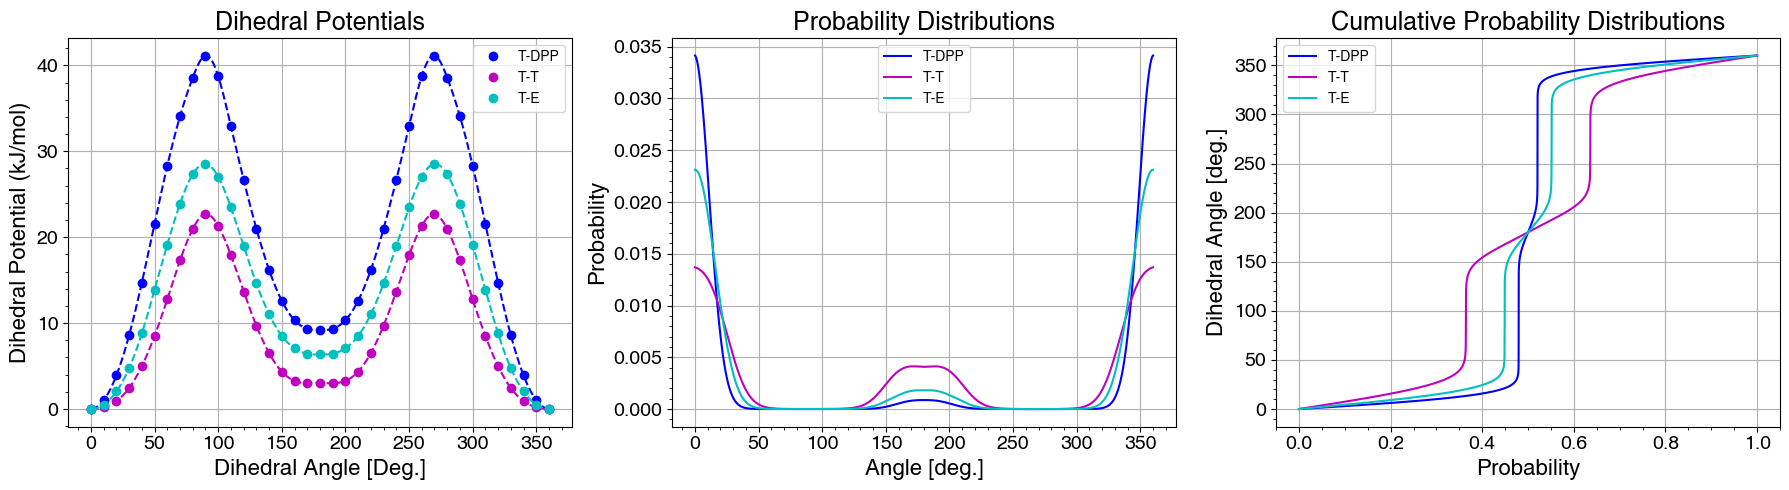

In [2]:
all_data = {}
for key, label_info in labels.items():
    all_data[key] = {**utils.setup_interpolation(label_info, kTval), **label_info}
utils.plot_dihedral_potentials(all_data)

In [3]:
lp_repeats, lam = utils.compute_correlation(all_data=all_data,
                                                       l_list=l,
                                                       Angle_rad=Angle,
                                                       rotation_types=rotation,
                                                       kTval=kTval)

print(f"Max eigen value: lambda_max = {lam:.12f}")
print(f"Correlation length = {lp_repeats:.6f}")
# Monte Carlo sampling: most results are in the range of 8.99 to 9.05

Max eigen value: lambda_max = 0.895481986633
Correlation length = 9.058531
